In [2]:
import sys
import types
import pandas as pd
from ibm_botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Importing data and relavent code libraries.

In [ ]:
#Personal Keys Removed

In [4]:
client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

In [5]:
df = pd.read_pickle('./df_raw_local.pkl')
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-05 10:29:10,45554675,DOOR/WINDOW,10016.0,500 2 AVENUE,2 AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.741111,-73.978539,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-05 12:51:21,45553708,ELECTRIC,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-05 20:44:10,45554755,HEAT/HOT WATER,11216.0,815 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.673471,-73.950921,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-05 07:47:17,45553828,HEAT/HOT WATER,10003.0,332 EAST 9 STREET,EAST 9 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728796,-73.986351,2020-02-05T17:25:20.000,RESIDENTIAL BUILDING,Closed
4,2020-02-05 18:48:25,45553886,HEAT/HOT WATER,10034.0,125 VERMILYEA AVENUE,VERMILYEA AVENUE,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.866492,-73.921313,NaN,RESIDENTIAL BUILDING,Open


In [6]:
#Creating a mask to seperated the data set into only hot ater complaints. Then checking values to confirm it worked
mask=(df['complaint_type']=='HEAT/HOT WATER')
maskb=(df['complaint_type']=='HEATING')
df_heating=df.loc[mask | maskb]
df_heating['complaint_type'].value_counts()

HEAT/HOT WATER    1263069
HEATING            887869
Name: complaint_type, dtype: int64

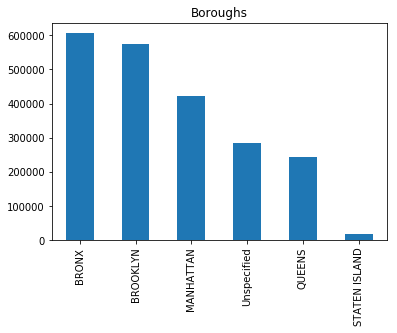

In [7]:
#Creating a table to make comparing the different boroughs easier to visualise
df_heating['borough'].value_counts().plot(kind='bar', title='Boroughs')

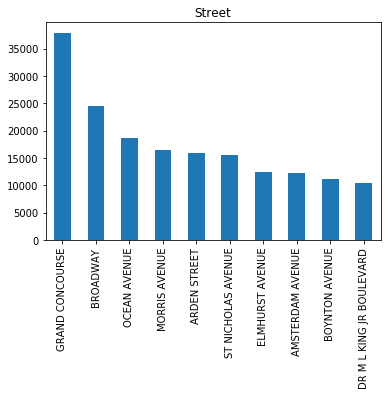

In [14]:
#Due to the quantity of possible categories and the different scale of complaint quantity, I cut off a portion of the data
df_heating['street_name'].value_counts().head(n=10).plot(kind='bar',title='Street')

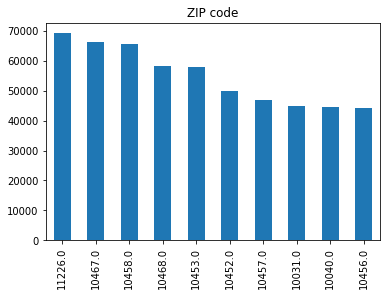

In [15]:
df_heating['incident_zip'].value_counts().head(n=10).plot(kind='bar',title='ZIP code')

In [16]:
#From our data we can see that both the bronx and brocklyn have by far the highest number of complaints, and are relitively comparable to each other. However grand concourse street has almost double the number of complaints of pretty much any other street. 
#Given that this road also runs through some of the zip codes with the highest rates of complaints, I would argue that focusing on the bronx and specifically the complaints from the grand concourse would be the best course of action.
#Incase it is needed later, uploading a version of df_heating.
df_heating.to_pickle('./df_heating.pkl')
client_cred.upload_file('./df_heating.pkl',bucket,'df_heating_cos.pkl')